# Run Vanilla (hard size limit decreased)

In [2]:
import sys
import os
path_to_top_dir = "../"
# Dynamically add the `project` directory to the path
sys.path.append(os.path.abspath(path_to_top_dir))

In [3]:
os.path.abspath(path_to_top_dir)

'c:\\Users\\paulj\\Desktop\\prosjekt\\pom_cpu-model'

In [4]:
# Print current working directory
os.getcwd()

'c:\\Users\\paulj\\Desktop\\prosjekt\\pom_cpu-model\\runs'

In [5]:
# Import scent_gfn functions
from scent_gfn.fragments import FRAGMENTS, FRAGMENTS_OPENPOM_DATASET, FRAGMENTS_OPENPOM_VANILLA
from scent_gfn.molecule import MoleculeTrainer

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'
c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module impli

| **Parameter**                | **Value**      |
|------------------------------|----------------|
| Reward function type         | OpenPOM        |
| Similarity measure           | Cosine         |
| Graph building               | Fragments Vanilla      |
| Iterations                   | 500            |
| Max number of nodes          | 6              |
| Illegal action logreward     | -100           |
| β                            | 1             |
| Large molecule penalty       | None           |

In [10]:
params = {
    "save_name": "vanilla12",
    "reward_func": "openpom", # structure, openpom
    "similarity": "cosine",
    "graph_building": FRAGMENTS_OPENPOM_VANILLA,#FRAGMENTS,
    "iterations": 500,
    "max_nodes": 10,
    "illegal_logreward": -100,
    "beta": 1.0,
    "large_mol_pen": ["hard", 17]# ["exponential", 15] # ["exponential", 15] , ["hard", 15], [None,None]
}

In [6]:
# Utilities
import warnings
import random
import datetime

# Data processing and file management
import pathlib
import pandas as pd
import json
import numpy as np

# Machine learning
import torch
from gflownet.config import init_empty, Config
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage, MolToImage


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run on cpu
dev = torch.device('cpu')

In [7]:
def get_vanilla_test_and_training(split_ratio=0.7):
    df = pd.read_csv("../data/data.csv")
    vanilla_mols_df = df.loc[df['vanilla'] == 1]
    vanilla_smiles_trainig= list(vanilla_mols_df["nonStereoSMILES"])
    vanilla_smiles_trainig = random.sample(vanilla_smiles_trainig, round(len(vanilla_mols_df)*split_ratio))
    random.shuffle(vanilla_smiles_trainig)
    vanilla_smiles_test = []
    for i in vanilla_mols_df["nonStereoSMILES"]:
        if i not in vanilla_smiles_trainig:
            vanilla_smiles_test.append(i)
    return vanilla_smiles_trainig, vanilla_smiles_test

def get_vanillin():
    return ["COc1cc(C=O)ccc1O"]

In [8]:
target = get_vanillin()

In [11]:
# Initialize model
config = init_empty(Config())
config.print_every = 1
config.log_dir = f"{os.path.abspath(path_to_top_dir)}/results/{params['save_name']}_{datetime.datetime.now().strftime('%Y-%m-%d__%H_%M_%S')}"
config.device = dev
config.num_training_steps = params["iterations"]
config.num_workers = 0
config.num_validation_gen_steps = 1
config.overwrite_existing_exp=False
config.checkpoint_every = 100
config.algo.max_nodes = params["max_nodes"] #12 # 95 quantil
config.store_all_checkpoints = True
config.algo.illegal_action_logreward = params["illegal_logreward"]

if params["graph_building"] == None:
     trial = MoleculeTrainer(config,(params["reward_func"], params["similarity"],params["large_mol_pen"], target, params["beta"]), print_config=True) #,fragments=FRAGMENTS, print_config=True)
else:
    trial = MoleculeTrainer(config,(params["reward_func"], params["similarity"],params["large_mol_pen"], target, params["beta"]),fragments=params["graph_building"], print_config=True) #,fragments=FRAGMENTS, print_config=True)

SMILES input data detected ...
Reward function: reward_function_openpom | Similarity measure: cosine_similarity | exp_penalty: False | max_mol=17
Building molecules using fragments ...


Hyperparameters:

desc: noDesc
log_dir: c:\Users\paulj\Desktop\prosjekt\pom_cpu-model/results/vanilla12_2025-01-29__09_16_18
device: cpu
seed: 0
validate_every: 1000
checkpoint_every: 100
store_all_checkpoints: true
print_every: 1
start_at_step: 0
num_final_gen_steps: null
num_validation_gen_steps: 1
num_training_steps: 500
num_workers: 0
hostname: null
pickle_mp_messages: false
git_hash: f106cde
overwrite_existing_exp: false
algo:
  method: TB
  num_from_policy: 64
  num_from_dataset: 0
  valid_num_from_policy: 64
  valid_num_from_dataset: 0
  max_len: 128
  max_nodes: 10
  max_edges: 128
  illegal_action_logreward: -100.0
  train_random_action_prob: 0.0
  train_det_after: null
  valid_random_action_prob: 0.0
  sampling_tau: 0.9
  tb:
    bootstrap_own_reward: false
    epsilon: null
    reward_loss_m

In [12]:
trial.run()

29/01/2025 09:16:25 - INFO - logger - Starting training
29/01/2025 09:16:34 - INFO - logger - iteration 1 : offline_loss:0.00 online_loss:813.75 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:0.35 loss:813.75 n_loss:0.00 tb_loss:813.75 batch_entropy:34.01 traj_lens:13.48 grad_norm:528.45 grad_norm_clip:71.76 sampled_reward_avg:0.40 train_time:2.33 time_spent:8.46
29/01/2025 09:16:42 - INFO - logger - iteration 2 : offline_loss:0.00 online_loss:915.00 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 logZ:0.31 loss:915.00 n_loss:0.00 tb_loss:915.00 batch_entropy:31.87 traj_lens:12.92 grad_norm:661.19 grad_norm_clip:72.62 sampled_reward_avg:0.42 train_time:2.20 time_spent:8.20
29/01/2025 09:16:50 - INFO - logger - iteration 3 : offline_loss:0.00 online_loss:842.90 reward_loss:0.00 invalid_trajectories:0.00 invalid_logprob:0.00 invalid_losses:0.00 backward_vs_unif:0.00 l

In [13]:
with open(os.path.join(config.log_dir, "params.json"), "w+") as file:
    json.dump(params,file)

with open(os.path.join(config.log_dir, "target.json"), "w+") as file:
    json.dump(target,file)

state = {
    "models_state_dict": [trial.model.state_dict()],
    "cfg": trial.cfg,
    "env_ctx": trial.model.env_ctx,
    #"model": trial.model,
}
if trial.sampling_model is not trial.model:
    state["sampling_model_state_dict"] = [trial.sampling_model.state_dict()]
fn = pathlib.Path(trial.cfg.log_dir) / "model_final_save.pt"
with open(fn, "wb") as fd:
    torch.save(
        state,
        fd,
    )

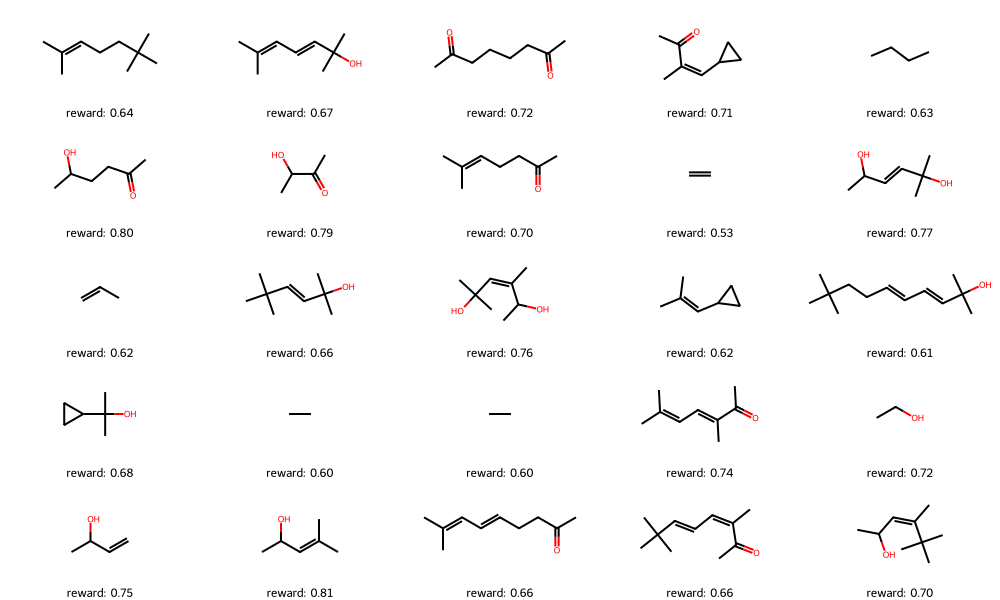

In [14]:
# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trial.task.compute_obj_properties(objs)
cond_info = trial.task.sample_conditional_information(len(obj_props), 1)
log_rewards = trial.task.cond_info_to_logreward(cond_info, obj_props)
index = 0
rewards = []
for i in is_valid:
    if i:
        rewards.append(list(log_rewards)[index])
        index += 1 
    else:
        rewards.append(0)

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==0 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])

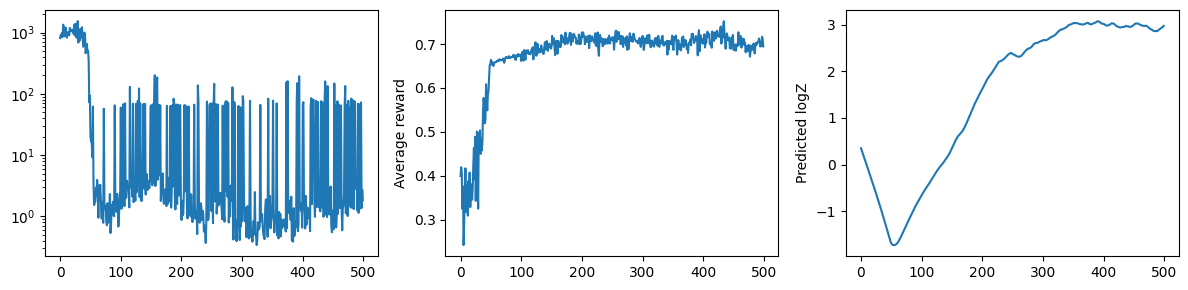

In [15]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()